In [4]:
import matplotlib.pyplot as plt

In [1]:
import gc
import random

import numpy as np
import pandas as pd
import polars as pl

# from astronet.constants import LSST_FILTER_MAP as ELASTICC_FILTER_MAP
from astronet.constants import ELASTICC_FILTER_MAP
from astronet.constants import LSST_PB_COLORS as ELASTICC_PB_COLORS
from astronet.preprocess import (
    generate_gp_all_objects,
    generate_gp_single_event,
    remap_filters,
)
from astronet.viz.visualise_data import plot_event_data_with_model
from elasticc.constants import CLASS_MAPPING, ROOT

SEED = 9001

pd.options.mode.dtype_backend = "pyarrow"

df = (
    pl.scan_parquet(f"{ROOT}/data/processed/all-classes-tsonly/class*")
    .with_columns(pl.col("target").cast(pl.Int64).map_dict(CLASS_MAPPING))
    .limit(10_000)
    .collect(streaming=True)
)

Environment variable not set:'ROOT'.
Defining relative to constants.py file


STREAMING CHUNK SIZE: 4545 rows


In [5]:
pdf = df.filter(pl.col("target") == "SNIa").filter(pl.col("object_id") == 2001348007).drop("object_id", "target", "branch", "uuid")





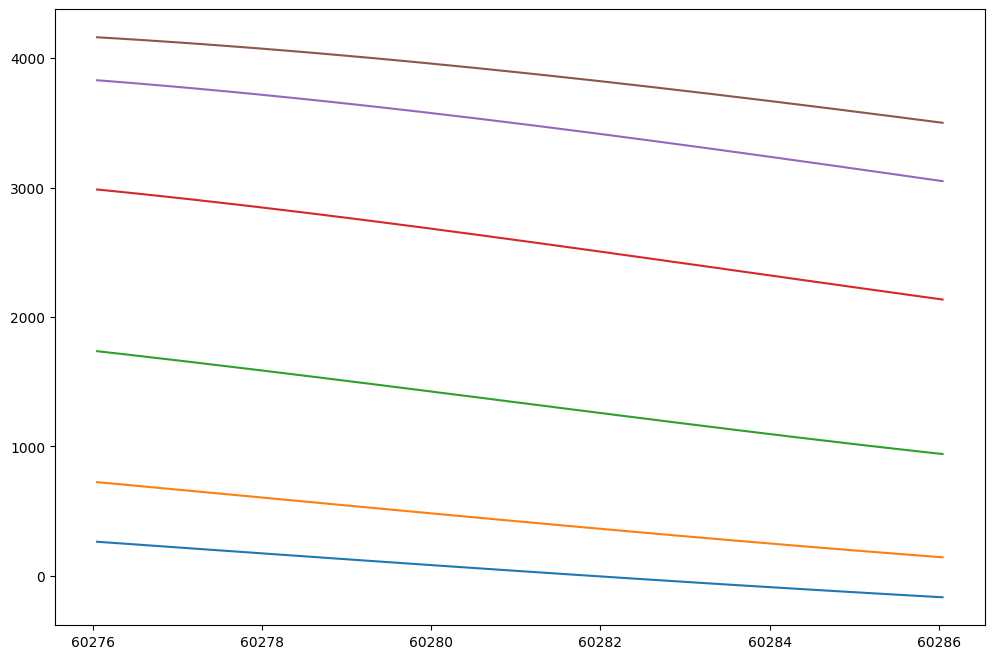

In [8]:
plt.plot(pdf.select("mjd"), pdf.drop("mjd").to_pandas())